# Intro to Machine Learning Homework 2

### Bryce Readyhough 
### ID-801005029

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Loading in the dataset and displaying the first few rows

In [2]:
dataset = pd.read_csv("diabetes.csv")

In [3]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = dataset.iloc[:, [0,1,2,3,4,5,6,7]]
Y = dataset.iloc[:, 8]
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


Next, feature scaling was applied to the test and eval datasets. This Scales the datapoints so that they all fall within 0 and 1. This Will be vwery important to allow the algorithm to distinguish between the number of pregnancies which is a realtivaly low number and the glucose value which is a relatively high number.

In [5]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X[:10])

[[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
  -0.36506078 -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 -1.28821221 -0.69289057 -1.10325546
   0.60439732 -0.10558415]
 [-0.84488505 -0.99820778 -0.16054575  0.15453319  0.12330164 -0.49404308
  -0.92076261 -1.04154944]
 [-1.14185152  0.5040552  -1.50468724  0.90726993  0.76583594  1.4097456
   5.4849091  -0.0204964 ]
 [ 0.3429808  -0.15318486  0.25303625 -1.28821221 -0.69289057 -0.81134119
  -0.81807858 -0.27575966]
 [-0.25095213 -1.34247638 -0.98770975  0.71908574  0.07120427 -0.12597727
  -0.676133   -0.61611067]
 [ 1.82781311 -0.184482   -3.57259724 -1.28821221 -0.69289057  0.41977549
  -1.02042653 -0.36084741]
 [-0.54791859  2.38188392  0.04624525  1.53455054  4.02192191 -0.18943689
  -0.94794368  1.68125866]
 [ 1.23388019  0.12848945  1.39038675 -1.28821221 -0.69289057 -4.06047387
  -0.7244549   1.7

Splitting the dataset into Training and Evaluation datasets. For this Homework an 80-20 split was used; where 80% of the data was in the training set and 20% was in the evaluation set.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_eval, Y_train, Y_eval = train_test_split(X, Y, test_size = 0.2, random_state = np.random.randint(1), shuffle = 0)

## Problem 1
Using the dataset a logistic regression binary classifier was built

In [7]:
from sklearn.linear_model import LogisticRegression 
Prob1Classifier = LogisticRegression(random_state=0) 
Prob1Classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [8]:
prob1_Y_prediction = Prob1Classifier.predict(X_eval)
prob1_Y_prediction[0:9]

array([1, 0, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

Building the confusion matrix to determine the accuracy of the model

In [9]:
from sklearn.metrics import confusion_matrix 
prob1_cnf_matrix = confusion_matrix(Y_eval, prob1_Y_prediction) 
prob1_cnf_matrix 

array([[98,  9],
       [18, 29]], dtype=int64)

In [10]:
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(Y_eval, prob1_Y_prediction)) 
print("Precision:",metrics.precision_score(Y_eval, prob1_Y_prediction)) 
print("Recall:",metrics.recall_score(Y_eval, prob1_Y_prediction))

Accuracy: 0.8246753246753247
Precision: 0.7631578947368421
Recall: 0.6170212765957447


Text(0.5, 257.44, 'Predicted label')

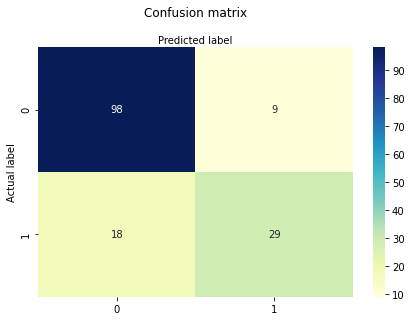

In [11]:
import seaborn as sns 
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(prob1_cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

## Problem 2
This time a Naive Bays classifier was used. The same dataset was used as in Problem 1 with the same 80-20 split between training and evaluaation

In [12]:
from sklearn.naive_bayes import GaussianNB 
classifier = GaussianNB() 
classifier.fit(X_train, Y_train)

prob2_Y_prediction = classifier.predict(X_eval)

In [13]:
prob2_cnf_matrix = confusion_matrix(Y_eval, prob2_Y_prediction) 
prob2_cnf_matrix 

print("Accuracy:",metrics.accuracy_score(Y_eval, prob2_Y_prediction)) 
print("Precision:",metrics.precision_score(Y_eval, prob2_Y_prediction)) 
print("Recall:",metrics.recall_score(Y_eval, prob2_Y_prediction))

Accuracy: 0.7922077922077922
Precision: 0.6744186046511628
Recall: 0.6170212765957447


Text(0.5, 257.44, 'Predicted label')

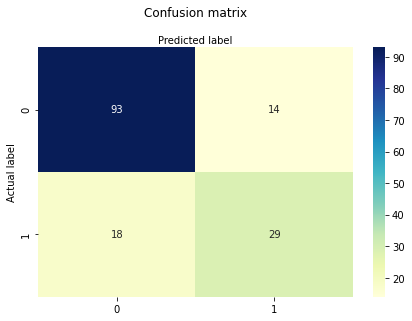

In [14]:
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(prob2_cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

## Problem 3
The logisitic regression from Problem 1 was built once more. This time, however, K-fold cross-validation was implemented. A value of K=5 and K=10 was used. Because we are using K-Folds the data was not split into an eval and training set.

First the K-Fold validation was run with K=5:

In [15]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

Prob3Classifier = LogisticRegression(random_state=0) 

evalMetrics = ['accuracy', 'precision', 'recall']
K5Folds = KFold(n_splits=5, random_state=1, shuffle=True)
prob3AScores = cross_validate(Prob3Classifier, X, Y, scoring=evalMetrics, cv=K5Folds, n_jobs=-1)

print(prob3AScores)

{'fit_time': array([0.00350165, 0.00300145, 0.00300026, 0.00300169, 0.00350094]), 'score_time': array([0.00149965, 0.00149989, 0.00150132, 0.00149989, 0.00150037]), 'test_accuracy': array([0.77922078, 0.76623377, 0.77272727, 0.79084967, 0.73856209]), 'test_precision': array([0.75609756, 0.71428571, 0.70454545, 0.71428571, 0.69047619]), 'test_recall': array([0.56363636, 0.55555556, 0.58490566, 0.6       , 0.51785714])}


With K-Folds the final Accuracy, Precision, and Recall is the average of each of the folds. This produces the following results:

In [16]:
sorted(prob3AScores)

['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall']

In [17]:
import statistics

prob3AAccuracy = statistics.mean(prob3AScores['test_accuracy'])
prob3APrecision = statistics.mean(prob3AScores['test_precision'])
prob3ARecall = statistics.mean(prob3AScores['test_recall'])

print("Accuracy:",prob3AAccuracy) 
print("Precision:",prob3APrecision) 
print("Recall:",prob3ARecall)

Accuracy: 0.7695187165775401
Precision: 0.7159381269137367
Recall: 0.5643909444852842


Next it was run again with K=10

In [18]:
K10Folds = KFold(n_splits=10, random_state=1, shuffle=True)
prob3BScores = cross_validate(Prob3Classifier, X, Y, scoring=evalMetrics, cv=K10Folds, n_jobs=-1)

print(prob3BScores)

{'fit_time': array([0.00300026, 0.00300097, 0.00300097, 0.0030005 , 0.0030005 ,
       0.00300097, 0.00300026, 0.0035007 , 0.00450182, 0.00350046]), 'score_time': array([0.00200057, 0.00200033, 0.00149989, 0.00199962, 0.00200033,
       0.00200033, 0.00200033, 0.00150013, 0.00199986, 0.00150037]), 'test_accuracy': array([0.77922078, 0.77922078, 0.80519481, 0.72727273, 0.84415584,
       0.72727273, 0.85714286, 0.74025974, 0.71052632, 0.76315789]), 'test_precision': array([0.75      , 0.76470588, 0.82608696, 0.57894737, 0.9047619 ,
       0.56521739, 0.77272727, 0.68421053, 0.6       , 0.75      ]), 'test_recall': array([0.62068966, 0.5       , 0.63333333, 0.45833333, 0.65517241,
       0.54166667, 0.73913043, 0.48148148, 0.46153846, 0.6       ])}


With K-Folds the final Accuracy, Precision, and Recall is the average of each of the folds. This produces the following results:

In [19]:
sorted(prob3BScores)

['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall']

In [20]:
prob3BAccuracy = statistics.mean(prob3BScores['test_accuracy'])
prob3BPrecision = statistics.mean(prob3BScores['test_precision'])
prob3BRecall = statistics.mean(prob3BScores['test_recall'])

print("Accuracy:",prob3BAccuracy) 
print("Precision:",prob3BPrecision) 
print("Recall:",prob3BRecall)

Accuracy: 0.7733424470266576
Precision: 0.7196657302405047
Recall: 0.5691345780101402


## Problem 4
The logisitic regression from Problem 2 was built once more. This time, however, K-fold cross-validation was implemented. A value of K=5 and K=10 was used. Because we are using K-Folds the data was not split into an eval and training set.

First the K-Fold validation was run with K=5:

In [21]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB 

Prob4Classifier = GaussianNB()

evalMetrics = ['accuracy', 'precision', 'recall']
K5Folds = KFold(n_splits=5, random_state=1, shuffle=True)
prob4AScores = cross_validate(Prob4Classifier, X, Y, scoring=evalMetrics, cv=K5Folds, n_jobs=-1)

print(prob4AScores)

{'fit_time': array([0.00049996, 0.00099993, 0.00100017, 0.00099945, 0.00100017]), 'score_time': array([0.00199986, 0.00199986, 0.00199986, 0.00200033, 0.00150037]), 'test_accuracy': array([0.77272727, 0.73376623, 0.73376623, 0.77777778, 0.77124183]), 'test_precision': array([0.70833333, 0.63265306, 0.63043478, 0.66      , 0.72340426]), 'test_recall': array([0.61818182, 0.57407407, 0.54716981, 0.66      , 0.60714286])}


In [22]:
import statistics

prob4AAccuracy = statistics.mean(prob4AScores['test_accuracy'])
prob4APrecision = statistics.mean(prob4AScores['test_precision'])
prob4ARecall = statistics.mean(prob4AScores['test_recall'])

print("Accuracy:",prob4AAccuracy) 
print("Precision:",prob4APrecision) 
print("Recall:",prob4ARecall)

Accuracy: 0.7578558696205755
Precision: 0.6709650864971336
Recall: 0.6013137121439008


In [23]:
K10Folds = KFold(n_splits=10, random_state=1, shuffle=True)
prob4BScores = cross_validate(Prob4Classifier, X, Y, scoring=evalMetrics, cv=K10Folds, n_jobs=-1)

print(prob4BScores)

{'fit_time': array([0.00099993, 0.00049973, 0.00100017, 0.00100017, 0.0010004 ,
       0.00100017, 0.00099969, 0.0010004 , 0.00099993, 0.00150061]), 'score_time': array([0.00200009, 0.00200057, 0.00200009, 0.00200009, 0.00150037,
       0.00150037, 0.00150037, 0.00149989, 0.00150084, 0.00149965]), 'test_accuracy': array([0.79220779, 0.76623377, 0.83116883, 0.62337662, 0.79220779,
       0.71428571, 0.79220779, 0.76623377, 0.75      , 0.73684211]), 'test_precision': array([0.76      , 0.68181818, 0.84      , 0.4       , 0.74074074,
       0.54545455, 0.62962963, 0.69565217, 0.66666667, 0.69230769]), 'test_recall': array([0.65517241, 0.57692308, 0.7       , 0.41666667, 0.68965517,
       0.5       , 0.73913043, 0.59259259, 0.53846154, 0.6       ])}


In [24]:
prob4BAccuracy = statistics.mean(prob4BScores['test_accuracy'])
prob4BPrecision = statistics.mean(prob4BScores['test_precision'])
prob4BRecall = statistics.mean(prob4BScores['test_recall'])

print("Accuracy:",prob4BAccuracy) 
print("Precision:",prob4BPrecision) 
print("Recall:",prob4BRecall)

Accuracy: 0.7564764183185236
Precision: 0.66522696305305
Recall: 0.600860189563338
